<ipython-input-3-0e8044d4b808>:45: RuntimeWarning: invalid value encountered in double_scalars
  H[x,y]=(np.arccos(0.5*((R[x,y]-G[x,y])+(R[x,y]-B[x,y]))/np.sqrt((R[x,y]-G[x,y])**2+(R[x,y]-B[x,y])*(G[x,y]-B[x,y])))/pi*180)


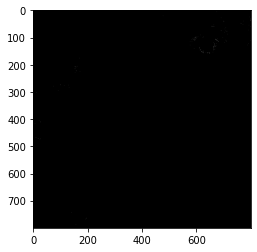

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math
pi=math.pi
r=np.empty([800,800])
g=np.empty([800,800])
b=np.empty([800,800])
def HSI2RGB(im,H,S,I,R,G,B):
  for x in range(0,800):
    for y in range(0,800):
      if(0<=H[x,y]<120):
        B[x,y]=I[x,y]*(1-S[x,y])
        R[x,y]=I[x,y]*(1+S[x,y]*np.cos(H[x,y]*pi/180)/np.cos((60-H[x,y])*pi/180))
        G[x,y]=3*I[x,y]-(R[x,y]+B[x,y])
      elif(120<=H[x,y]<240):
        H[x,y]=H[x,y]-120
        R[x,y]=I[x,y]*(1-S[x,y])
        G[x,y]=I[x,y]*(1+S[x,y]*np.cos(H[x,y]*pi/180)/np.cos((60-H[x,y])*pi/180))
        B[x,y]=3*I[x,y]-(R[x,y]+G[x,y])
      else:
        H[x,y]=H[x,y]-240
        G[x,y]=I[x,y]*(1-S[x,y])
        B[x,y]=I[x,y]*(1+S[x,y]*np.cos(H[x,y]*pi/180)/np.cos((60-H[x,y])*pi/180))
        R[x,y]=3*I[x,y]-(G[x,y]+B[x,y])
  im[:,:,0]=R
  im[:,:,1]=G
  im[:,:,2]=B
  return im
img=plt.imread("/content/drive/MyDrive/DIPproject4/LovePeace rose.tif")
diff=cv2.imread("/content/drive/MyDrive/DIPproject4/LovePeace rose.tif",cv2.IMREAD_GRAYSCALE)
img=np.float32(img)/256
img1=np.copy(img)
R=img[:,:,0]
G=img[:,:,1]
B=img[:,:,2]
H=np.copy(R)
I=np.divide(R+G+B,3)
i=np.copy(I)
minimum=np.minimum(np.minimum(R,G),B)
S=1-(3/(R+G+B)*minimum)
for x in range(0,800):
  for y in range(0,800):
    H[x,y]=(np.arccos(0.5*((R[x,y]-G[x,y])+(R[x,y]-B[x,y]))/np.sqrt((R[x,y]-G[x,y])**2+(R[x,y]-B[x,y])*(G[x,y]-B[x,y])))/pi*180)
    if(B[x,y]<=G[x,y]):
      H[x,y]=H[x,y]
    else:
      H[x,y]=360-H[x,y]
Laplacian_R=cv2.Laplacian(R,cv2.CV_32F,3)
Laplacian_G=cv2.Laplacian(G,cv2.CV_32F,3)
Laplacian_B=cv2.Laplacian(B,cv2.CV_32F,3)
Laplacian_I=cv2.Laplacian(i,cv2.CV_32F,3)
Laplacian_R=cv2.convertScaleAbs(Laplacian_R)
Laplacian_G=cv2.convertScaleAbs(Laplacian_G)
Laplacian_B=cv2.convertScaleAbs(Laplacian_B)
Laplacian_I=cv2.convertScaleAbs(Laplacian_I)
img[:,:,0]=img[:,:,0]+Laplacian_R
img[:,:,1]=img[:,:,1]+Laplacian_G
img[:,:,2]=img[:,:,2]+Laplacian_B
Laplacian_I=I+Laplacian_I
img1=HSI2RGB(img1,H,S,Laplacian_I,r,g,b)
for i in range(0,800):
  for j in range(0,800):
    difference=(img[i,j,0]-img1[i,j,0]+img[i,j,1]-img1[i,j,1]+img[i,j,2]-img1[i,j,2])/3
    if(difference==0):
      diff[i,j]=180
    elif(difference>0):
      diff[i,j]=130
    else:
      diff[i,j]=135
plt.imshow(Laplacian_I,cmap='gray')      
plt.savefig('/content/drive/MyDrive/DIPproject4/HSIsharpening.png',dpi =200)